In [23]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [24]:
df = pd.read_csv('NEG_GAdelivery_ALL-2.csv')

In [25]:
df.columns.values

array(['chem_id', 'Pre-term-S47', 'Pre-term-U9', 'Pre-term-S8',
       'Pre-term-S7', 'Pre-term-S6', 'Pre-term-U59', 'Pre-term-S58',
       'Pre-term-S57', 'Pre-term-S56', 'Pre-term-U55', 'Pre-term-S54',
       'Pre-term-U53', 'Pre-term-S52', 'Pre-term-U51', 'Pre-term-U50',
       'Pre-term-U5', 'Pre-term-S49', 'Pre-term-S48', 'Pre-term-U46',
       'Pre-term-S45', 'Pre-term-S44', 'Pre-term-U43', 'Pre-term-U42',
       'Pre-term-U41', 'Pre-term-S40', 'Pre-term-U4', 'Pre-term-S39',
       'Pre-term-S38', 'Pre-term-U37', 'Pre-term-U36', 'Pre-term-S35',
       'Pre-term-U34', 'Pre-term-S33', 'Pre-term-S32', 'Pre-term-S31',
       'Pre-term-U30', 'Pre-term-S3', 'Pre-term-U29', 'Pre-term-U28',
       'Pre-term-U27', 'Pre-term-S26', 'Pre-term-U25', 'Pre-term-S24',
       'Pre-term-U23', 'Pre-term-U22', 'Pre-term-S21', 'Pre-term-U20',
       'Pre-term-S2', 'Pre-term-S19', 'Pre-term-S18', 'Pre-term-S17',
       'Pre-term-U16', 'Pre-term-S15', 'Pre-term-U14', 'Pre-term-S13',
       'Pre-term-S1

In [26]:
df = df.set_index('chem_id')
dr = df.loc[:, 'Pre-term-S47':'Full-term-U1']
dr.columns = dr.columns.str.replace('Pre-term', 'P')
dr.columns = dr.columns.str.replace('Full-term', 'F')

In [27]:
dr = dr.T

In [28]:
dr['color_MC'] = np.where(dr.index.str.contains('P'), 'red','orange')
dr['color_batch'] = np.where(dr.index.str.contains('-b1'), 'darkgray', 
                    np.where(dr.index.str.contains('-b2'),'dodgerblue',
                    np.where(dr.index.str.contains('-b3'), 'red','pink')))

In [29]:
dr12 = dr.loc[:, 'color_MC':'color_batch']
dr11 = dr.drop(['color_MC', 'color_batch'], axis=1)

In [30]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(dr11)

In [31]:
X_std

array([[-1.77563511, -0.48709439,  0.87395011, ..., -0.18044115,
        -0.12832063, -0.12225645],
       [ 0.62570035,  0.5261905 , -0.74587635, ..., -0.18084207,
        -0.12657586, -0.1220527 ],
       [ 0.88128928, -0.45771389,  0.22484991, ..., -0.17724194,
        -0.12631362, -0.12189896],
       ...,
       [-0.6578286 , -0.07587901,  1.13540568, ..., -0.17978627,
        -0.12563125, -0.12225592],
       [ 0.18002919, -0.36431351, -0.39887755, ..., -0.1809699 ,
        -0.12740115, -0.12168019],
       [-0.11815274,  0.10167858, -0.34918413, ..., -0.17841908,
        -0.12569737, -0.12175309]])

In [32]:
# Create a PCA instance: pca
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_std)

In [33]:
pca.explained_variance_ratio_

array([0.2231684 , 0.11533052, 0.04810631, 0.03688063, 0.03423205,
       0.0247416 , 0.02434378, 0.02398757, 0.01936464, 0.01851095,
       0.01695454, 0.01506491, 0.01406519, 0.01360013, 0.01294243,
       0.01194404, 0.01173907, 0.0109469 , 0.01052889, 0.01020955])

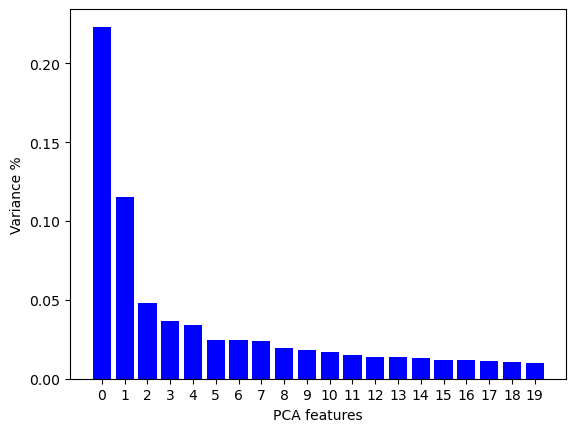

In [34]:
# Plot the explained variances
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('Variance %')
plt.xticks(features)
#plt.savefig('PCA features and the variance explained.png', dpi=400, bbox_inches = "tight")

plt.show()

In [35]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

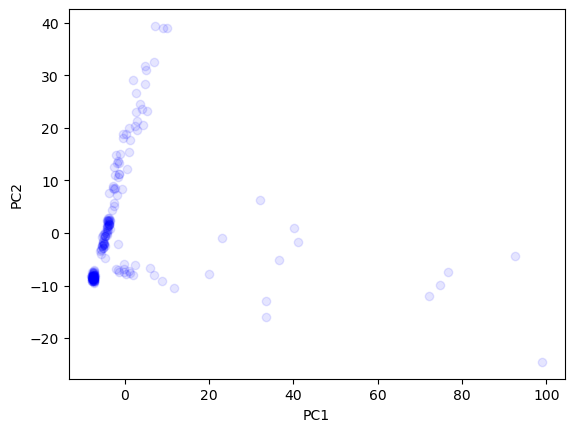

In [36]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='blue')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.savefig('PC1 and PC2 as a scatterplot.png', dpi=400, bbox_inches = "tight")
plt.show()

C:\Users\jix01\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jix01\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jix01\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jix01\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: User

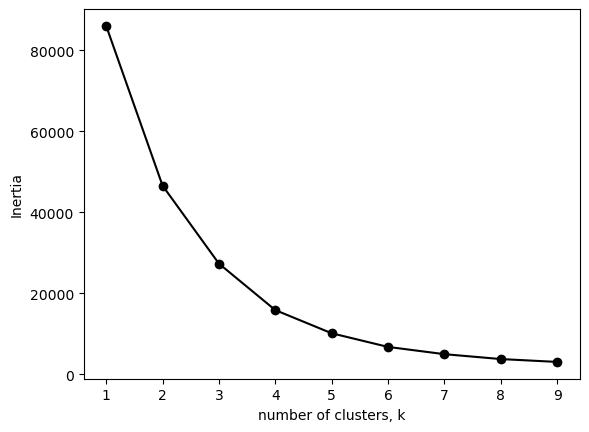

In [37]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, n_init=10)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
#plt.savefig('approximation of the optimal number of clusters in the dataset.png', dpi=400, bbox_inches = "tight")

plt.show()

In [38]:
from sklearn.cluster import KMeans

kmeans4 = KMeans(n_clusters=4)
y_kmeans4 =kmeans4.fit_predict(PCA_components)
print(y_kmeans4)

C:\Users\jix01\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jix01\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 2 1 3
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 3 0 1 0 0 0 0 1 0 0 3 0 0 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0
 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0
 0 0 0 0 0 0 3 0 0 0 0 0]


In [39]:
PCA_components.columns = ['PC'+ str(col) for col in PCA_components.columns]

In [40]:
PCA_components = PCA_components.reset_index(drop=True)
dr12 = dr12.reset_index(drop=True)

In [41]:
PCA_components = pd.concat([PCA_components, dr12], axis=1)

In [42]:
PCA_components

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,color_MC,color_batch
0,-3.625609,7.525699,3.544929,-3.883678,0.713272,67.670832,-9.164590,17.966374,-1.625930,-5.177774,...,-7.888960,-0.253556,-0.525823,0.698029,-3.033928,-0.972426,-0.243591,-1.615876,red,pink
1,-3.899583,0.494497,0.470117,0.806615,-0.074102,-0.737068,0.484308,0.095398,-0.269886,-0.468069,...,0.671820,0.390536,1.467376,-0.768500,0.171728,-0.279696,-0.965933,-1.996861,red,pink
2,-4.263747,1.217121,-0.273548,0.392596,-0.493393,-0.901808,-0.202148,-0.471180,-0.305147,0.725458,...,1.711554,3.856151,-0.547525,-0.503617,1.818612,-0.524449,-0.281149,-2.150605,red,pink
3,-1.560271,-2.184047,-1.619882,-2.174963,-1.273754,-1.229086,-1.493211,0.568766,-0.927507,-0.858609,...,1.030184,2.595973,-1.056738,-0.262561,1.095939,-0.294518,0.122254,-1.110123,red,pink
4,-4.667792,-0.543716,-0.740778,0.044050,-0.627995,-0.913637,0.094212,0.329374,-0.232321,0.687595,...,2.211214,1.719596,-0.590334,0.618924,1.703515,-1.574443,-0.637453,-0.530110,red,pink
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,-5.134238,-2.835127,1.045579,0.123580,0.072121,0.542103,0.018717,-0.928816,0.871448,-2.291670,...,-0.662539,0.659802,1.967750,-2.145618,0.042401,-0.808908,-0.411526,-0.845247,orange,pink
193,-7.486166,-7.787290,0.357291,0.949418,0.244648,-0.333052,0.032560,0.167481,-0.034772,-0.232068,...,-0.684066,0.349438,0.150531,-0.238812,0.999264,0.222167,-0.220507,2.136319,orange,pink
194,-5.272348,-2.196582,1.305008,-0.071208,-0.153693,1.488440,-0.589913,-0.720823,1.217600,-2.249595,...,-0.200455,0.793091,1.980653,-3.550646,0.299081,-0.158319,-0.386257,-1.564162,orange,pink
195,-7.234088,-7.050359,0.036744,0.550016,-0.024297,3.418509,-0.234040,1.283738,-1.201106,0.403520,...,-0.355140,1.414107,-0.891065,1.800946,1.888372,0.266092,-0.044754,1.465018,orange,pink


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

In [44]:
df = PCA_components
df.to_csv('PCA.csv')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

P v.s. F: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.043e-06 U_stat=5.730e+03


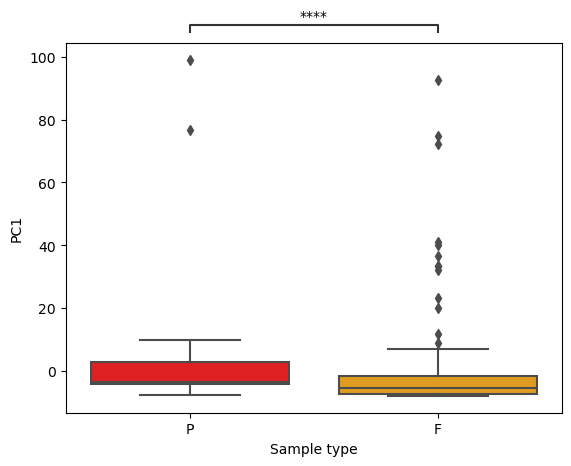

In [45]:
df = PCA_components
df['color_MC'] = df['color_MC'].str.replace('red','P')
df['color_MC'] = df['color_MC'].str.replace('orange','F')

x = "color_MC"
y = "PC0"
my_pal = {"P": "red", "F": "orange"}
order = ['P', 'F']
ax = sns.boxplot(data=df, x=x, y=y, order=order, palette=my_pal) 
plt.xlabel('Sample type')
plt.ylabel('PC1')
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("P", "F")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
plt.savefig('boxplot for PC1 by sample type.png', dpi=400, bbox_inches = "tight")